# Proyek Analisis Data: Nama dataset
- Nama: Tsabit Danendra Fatah
- Email: tsabitdanendra@gmail.com
- Id Dicoding: tsabitdanendra

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend pembelian customer (banyaknya jumlah order) setiap tahunnya?
2. Metode pembayaran apa yang paling sering digunakan dan paling sedikit digunakan?
3. Mana yang lebih banyak? order yang diberikan rating dan tidak?
4. Bagaimana persebaran score rating yang diberikan customer?
5. Kapan terakhir customer melakukan transaksi?
6. Berapa order terbanyak yang pernah customer lakukan?
7. Berapa pengeluaran terbanyak yang dikeluarkan customer?


## Menyiapkan semua library yang dibuthkan

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

##### Load table Orders dari "orders_dataset.csv"

In [54]:
orderDataPath = "Data/orders_dataset.csv"
ordersDf = pd.read_csv(orderDataPath)
ordersDf.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Load Table Payments dari "order_payments_dataset.csv"

In [55]:
paymentDataPath = "Data/order_payments_dataset.csv"
paymentsDf = pd.read_csv(paymentDataPath)
paymentsDf.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### Load table reviews dari "order_reviews_dataset.csv"

In [56]:
reviewDataPath = "Data/order_reviews_dataset.csv"
reviewsDf = pd.read_csv(reviewDataPath)
reviewsDf.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

##### Assessing data ordersDf

In [57]:
# cek tipe data
ordersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [58]:
# cek null data
ordersDf.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Table ordersDf memiliki data yang NULL pada columns: 
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date

In [59]:
# cek duplicated data
ordersDf.duplicated().sum()

0

ordersDf tidak memilki data yang duplikat

In [60]:
#cek numerical value & innacurate data
ordersDf.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Table ordersDf terlihat normal

##### Assessing data paymentsDf

In [61]:
# cek tipe data
paymentsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tabel paymentsDf tidak memiliki tipe data yang salah

In [62]:
# cek null data
paymentsDf.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tabel paymentsDf tidak memiliki data yang null

In [63]:
# cek duplicated data
paymentsDf.duplicated().sum()

0

Tidak ada data yang duplicated pada table paymentsDf

In [64]:
#cek numerical value & innacurate data
paymentsDf.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Table ordersDf terlihat normal tanpa adanya inaccurate value

##### Assessing data reviewsDf

In [65]:
# cek tipe data
reviewsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Table reviewsDf memiliki tipe data yang salah (seharusnya datetime) pada colomns: 
- review_creation_date
- review_answer_timestamp

In [66]:
# cek null data
reviewsDf.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Table reviewsDf memiliki data yang NULL pada colomns: 
- review_comment_title
- review_comment_message

In [67]:
# cek duplicated data
reviewsDf.duplicated().sum()

0

Tidak ada data yang duplicated pada table paymentsDf

In [68]:
#cek numerical value & innacurate data
reviewsDf.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Table reviewsDf terlihat normal tanpa adanya inaccurate value

In [69]:
tabel = {
    'ordersDf': ['Terdapat 5 Columns', 'Terdapat 3 Columns', '-', '-'],
    'paymentsDf': ['-', '-', '-', '-'],
    'reviewsDf': ['Terdapat 2 Columns', 'Terdapat 2 Columns', '-', '-']
}
masalah = ['Tipe Data', 'Missing Value', 'Duplicate Data', 'Inaccurate Value']
rangkumanMasalah = pd.DataFrame(tabel, index=masalah)
rangkumanMasalah


,ordersDf,paymentsDf,reviewsDf
Tipe Data,Terdapat 5 Columns,-,Terdapat 2 Columns
Missing Value,Terdapat 3 Columns,-,Terdapat 2 Columns
Duplicate Data,-,-,-
Inaccurate Value,-,-,-


### Cleaning Data

##### Cleaning data ordersDf

In [70]:
# mengganti tipe data columns menjadi datetime
dateCol = ['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in dateCol:
    ordersDf[column] = pd.to_datetime(ordersDf[column])
    
ordersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Column date yang sebelumnya memliki tipe data object telah berganti menjadi tipe data datetime

In [71]:
# Mengisi missing value
nullCols = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']
ordersDf[nullCols] = ordersDf[nullCols].interpolate(method='pad')
ordersDf.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Saya menggunakan function interpolate backfill untuk mengisi value yang kosong pada tabel ordersDf

##### Cleaning data reviewsDf

In [72]:
# mengganti columns tipe data menjadi datetime
dateCol = ['review_creation_date', 'review_answer_timestamp']

for column in dateCol:
    reviewsDf[column] = pd.to_datetime(reviewsDf[column])

reviewsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Column date yang sebelumnya memliki tipe data object telah berganti menjadi tipe data datetime

In [73]:
# Mengisi missing value
reviewsDf.fillna('-', inplace=True)
reviewsDf.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Missing value pada tabel reviewsDf diisi oleh '-'. Saya tidak melakukan dropping agar tidak menghilangkan informasi apapun. Selain itu, saya tidak menggunakan replace data (atau interpolate) agar tidak memengaruhi informasi yang diberikan dan menghindari salah replace data.

## Exploratory Data Analysis (EDA)

### Explore orderDf

#### Explore pertanyaan 1

In [74]:
# cek kesamaan jumlah kolom
orderIdColCount = ordersDf['order_id'].count()
orderPurchaseTimestampColCount = ordersDf['order_purchase_timestamp'].count()
selisih = orderIdColCount - orderPurchaseTimestampColCount
print(f'''Selisih row antara kolom : {selisih}\n''')

kolom = ['order_id','order_purchase_timestamp']
nullValue = ordersDf[kolom].isna().sum()
print(f'''Null value pada kedua kolom:\n{nullValue}''')

Selisih row antara kolom : 0

Null value pada kedua kolom:
order_id                    0
order_purchase_timestamp    0
dtype: int64


Bisa dilihat bahwa kedua kolom memiliki jumlah data yang sama dan tidak ada yang null pada setiap row kolom tersebut. Dengan hal ini, saya bisa menggunakan kolom 'order_purchase_timestamp' untuk melanjutkan proses exploratory analysis

In [75]:
# convert tahun dari kolom datetime
ordersDf['tahunPembelian'] = ordersDf['order_purchase_timestamp'].dt.year
ordersDf['tahunPembelian']

0        2017
1        2018
2        2018
3        2017
4        2018
         ... 
99436    2017
99437    2018
99438    2017
99439    2018
99440    2018
Name: tahunPembelian, Length: 99441, dtype: int32

Kode diatas mengambil bagian tahun dari kolom datetime 'order_purchase_timestamp'

In [76]:
# menghitung jumlah pembelian tiap tahun
jumlahPembelianTiapTahun = ordersDf.groupby('tahunPembelian').size().reset_index(name='jumlah')
jumlahPembelianTiapTahun

,tahunPembelian,jumlah
0,2016,329
1,2017,45101
2,2018,54011


Kode diatas menggunakan function 'groupby' untuk menghitung berapa bayak jumlah row pada tiap tahun
ordersDf

### Explore paymentsDf

#### Explore pertanyaan 2

In [77]:
# cek jumlah transaksi/metode
totalPayment = paymentsDf.groupby('payment_type').agg({'payment_type':'count'})
totalPayment

,payment_type
payment_type,
boleto,19784
credit_card,76795
debit_card,1529
not_defined,3
voucher,5775


Kode diatas mengahsilkan jumlah transaksi yang dilakukan sesuai dengan 'payment_type'-nya

### Explore reviewsDf

#### Explore pertanyaan 3

In [78]:
# cek jumlah review/review score
reviews = reviewsDf.groupby('review_score').agg({'review_score':'count'})
reviews

,review_score
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


Kode diatas menghasilkan banyaknya review dari setiap 'review_score'

### Explore reviewsDf dan ordersDf

#### Explore pertanyaan 4

In [79]:
# cluster review atau not review
reviewsDfOrderId = reviewsDf.order_id.tolist()
ordersDf['review_status'] = ordersDf['order_id'].apply(lambda x: "Review" if x in reviewsDfOrderId else "Not Review")

kode diatas menggunakan function lambda untuk mencari 'order_id' pada tabel ordersDF yang sesuai dengan 'order_id' pada tabel reviewsDf

In [80]:
# group by hasil
reviewsCompare = ordersDf.groupby('review_status').agg({'review_status':'count'})
reviewsCompare

,review_status
review_status,
Not Review,768
Review,98673


Kode diatas menghasilkan banyaknya customer yang memberikan review dan tidak

### Explore ordersDf dan paymentsDf

#### Explore pertanyaan 5, 6, dan 7

In [81]:
# merge tabel
mergedDf = pd.merge(ordersDf, paymentsDf[['order_id', 'payment_value']], on='order_id', how='inner')
mergedDf.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'tahunPembelian', 'review_status', 'payment_value'],
      dtype='object')

Kode diatas menyatukan 'ordersDf' dan 'paymentsDf', dan hanya mengambil kolom 'payment_value' dari tabel paymentsDf

In [82]:
# mengambil max date
current_date = max(mergedDf['order_purchase_timestamp'])

# Group by sesuai RFM
rfm_data = mergedDf.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days, 
    'order_id': 'count', 
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}).reset_index()

# contoh data RFM analysis
rfm_result = rfm_data.head()
rfm_result

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74
1,000161a058600d5901f007fab4c27140,458,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35
4,000379cdec625522490c315e70c7a9fb,198,1,107.01


Kode diatas menghasilkan RFM analysis dari tabel 'ordersDf' dan 'paymentsDf' yang telah disatukan

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

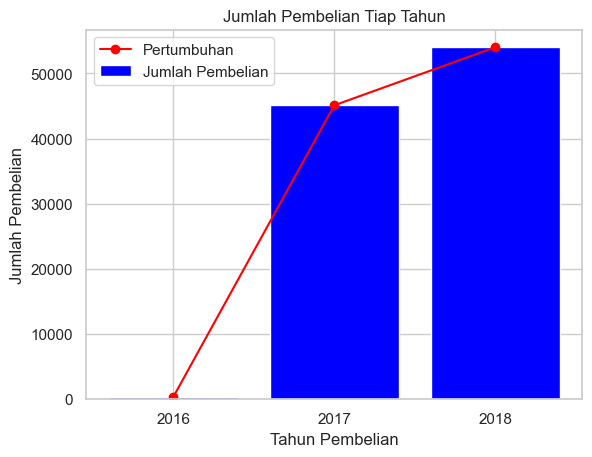

In [83]:

# Label dan judul
plt.xlabel('Tahun Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.title('Jumlah Pembelian Tiap Tahun')

# Filter untuk tahun 2016, 2017, dan 2018
selected_years = [2016, 2017, 2018]
filtered_data = jumlahPembelianTiapTahun[jumlahPembelianTiapTahun['tahunPembelian'].isin(selected_years)]
plt.xticks(selected_years)

# bar chart
plt.bar(filtered_data['tahunPembelian'], filtered_data['jumlah'], color='blue', label='Jumlah Pembelian')

# line chart
plt.plot(filtered_data['tahunPembelian'], filtered_data['jumlah'], marker='o', color='red', label='Pertumbuhan')

plt.legend()
plt.show()


Bar chart di atas membandingkan tahun dengan jumlah order yang dilakukan customer. Seperti yang dapat dilihat jumlah pembelian customer meningkat setiap tahunnya. Terjadi peningkatan yang signifikan dari tahun 2016 ke tahun 2017, dan dari tahun 2017 ke 2018, kembali terjadi peningkatan walaupun tidak seperti peningkatan sebelumnya. Garis merah menunjukkan trend pembelian customer 

### Pertanyaan 2: 

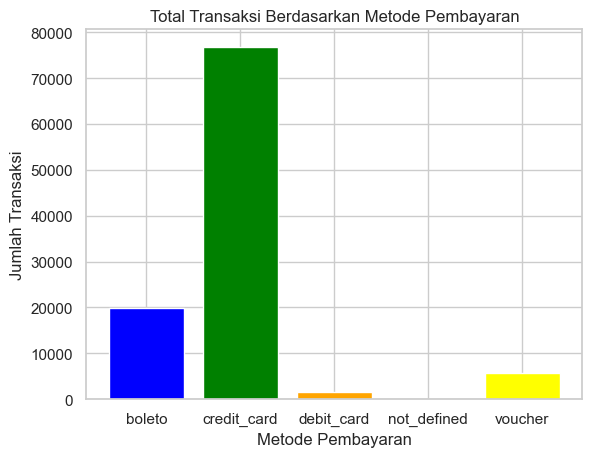

In [84]:
# Bar chart
plt.bar(totalPayment.index, totalPayment['payment_type'], color=['blue', 'green', 'orange', 'red', 'yellow'])

# Label dan judul
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.title('Total Transaksi Berdasarkan Metode Pembayaran')

plt.show()


Bar chart di atas membandingkan metode pembayaran dengan jumlah transaksi yang dilakukan customer. Seperti yang dapat dilihat, terdapat 5 jenis metode pembayaran yang digunakan customer. Metode pembayaran yang paling banyak digunakan adalah credit card dan yang paling sedikit adalah debit card. Ada juga metode pembayaran yang tidak didefiniskan oleh customer yang jumlahnya lebih sedikit dari debit card.

### Pertanyaan 3: 

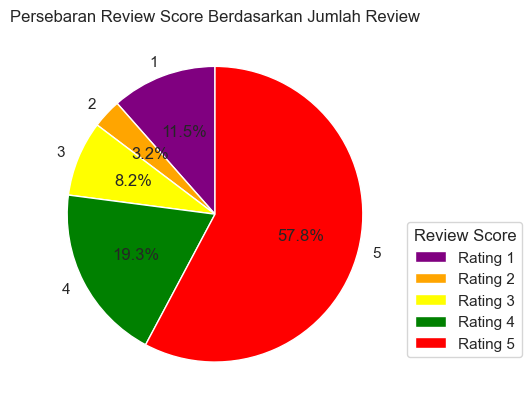

In [85]:
# Pie chart
plt.pie(reviews['review_score'], labels=reviews.index, autopct='%1.1f%%', startangle=90, colors=['purple', 'orange', 'yellow', 'green', 'red'])

# detail pie chart
plt.title('Persebaran Review Score Berdasarkan Jumlah Review')
plt.legend(title='Review Score', labels=[f'Rating {score}' for score in reviews.index], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()


Pie chart di atas menunjukkan persebaran Review Score (Rating 1-5) yang diberikan oleh customer untuk setiap review dari order yang telah mereka lakukan. Terlihat bahwa Rating dengan Review Score 5 memiliki persentase terbanyak dengan 57.7%, diikuti dengan Review Score 4 dengan mengisi 19.3% dari populasi. Selain itu Rating dengan Review Score 2 merupakan Review Score yang paling sedikit.

### Pertanyaan 4: 

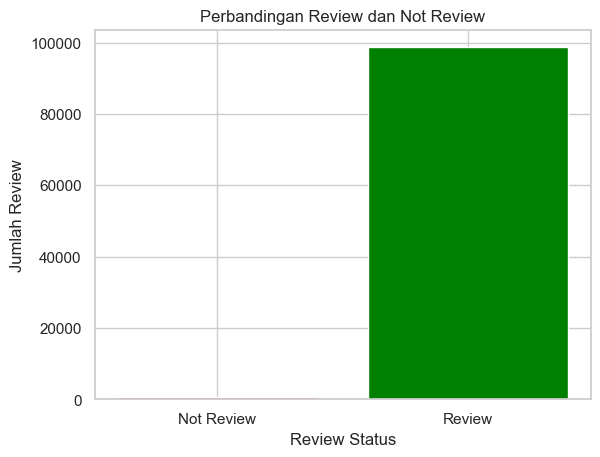

In [86]:
# bar chart
plt.bar(reviewsCompare.index, reviewsCompare['review_status'], color=['red', 'green'])

# Label dan judul
plt.xlabel('Review Status')
plt.ylabel('Jumlah Review')
plt.title('Perbandingan Review dan Not Review')

plt.show()


Bar chart di atas menunjukkan perbandingan antara customer yang memberikan review dan tidak memberikan review pada order yang mereka lakukan. Terlihat bahwa customer yang memberikan review jauh lebih banyak daripada customer yang tidak memberikan review.

### Pertanyaan 5, 6, dan 7: 

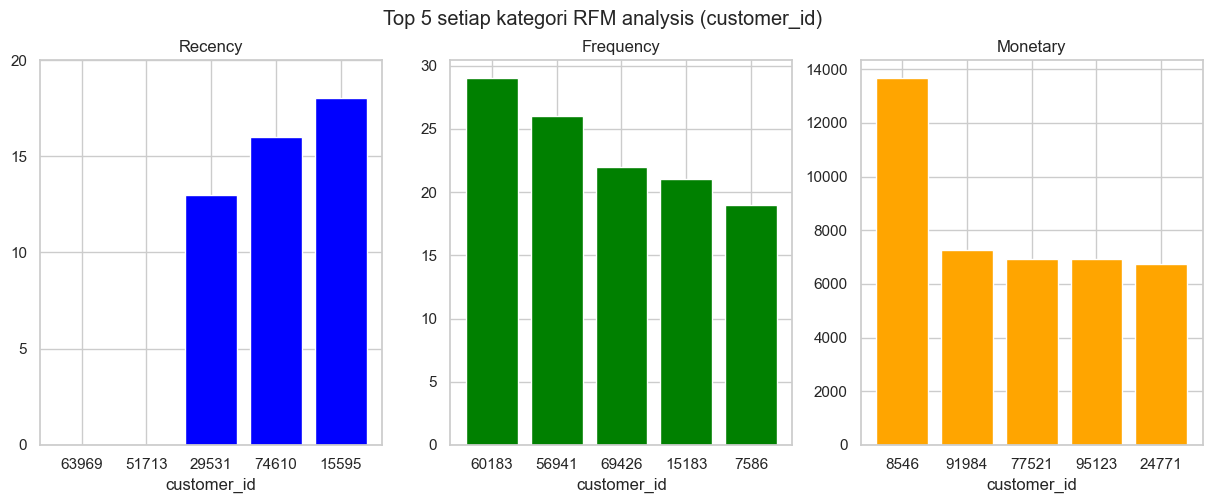

In [87]:
# Top 5/RFM analysis
rfm_data_recency_sorted = rfm_data.sort_values(by='Recency', ascending=True).head(5)
rfm_data_frequency_sorted = rfm_data.sort_values(by='Frequency', ascending=False).head(5)
rfm_data_monetary_sorted = rfm_data.sort_values(by='Monetary', ascending=False).head(5)

# parse index ke string
rfm_data_recency_sorted.index = rfm_data_recency_sorted.index.astype(str)
rfm_data_frequency_sorted.index = rfm_data_frequency_sorted.index.astype(str)
rfm_data_monetary_sorted.index = rfm_data_monetary_sorted.index.astype(str)

# set 3 chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Recency
axes[0].bar(rfm_data_recency_sorted.index, rfm_data_recency_sorted['Recency'], color='blue')
axes[0].set_title('Recency')
axes[0].set_yticks(range(0, 21, 5))
axes[0].set_xlabel('customer_id')


# Frequency
axes[1].bar(rfm_data_frequency_sorted.index, rfm_data_frequency_sorted['Frequency'], color='green')
axes[1].set_title('Frequency')
axes[1].set_xlabel('customer_id')

# Monetary
axes[2].bar(rfm_data_monetary_sorted.index, rfm_data_monetary_sorted['Monetary'], color='orange')
axes[2].set_title('Monetary')
axes[2].set_xlabel('customer_id')

# Label
fig.suptitle('Top 5 setiap kategori RFM analysis (customer_id)')

plt.show()


Kode diatas membagi hasil rfm_data sesuai dengan RFM analysis, lalu mengubah tipe data kolom index menjadi string untuk digunakan sebagai x axis, dan menampilkan data tersebut. saya menggunakan customer index sebagai x axis dikarenakan customer_id memiliki kata yang terlalu panjang, sehingga menghindari kesulitan membaca visualisasi data

## Conclusion

- Conclusion pertanyaan 1:
Jumlah pembelian customer meningkat setiap tahunnya. Bahkan terjadi peningkatan drastis dari tahun 2016 ke tahun 2017

- Conclusion pertanyaan 2:
Metode pembayaran yang paling banyak digunakan adalah credit card, dan yang paling sedikit digunakan adalah debit card. selain itu, terdapat metode pembayaran yang tidak didefinisikan dengan jumlah transaksi yang lebih sedikit dari metode pembayaran debit card

- Conclusion pertanyaan 3:
Jumlah order yang diberikan rating jauh lebih banyak daripada jumlah order yang tidak diberikan rating

- Conclusion pertanyaan 4:
Persebaran Rating yang diberikan customer cukup beragam, Rating score 5 merupakpan score paling banyak yang diberikan customer dan Rating score 2 yang paling sedikit diberikan oleh customer

- Conclusion pertanyaan 5:
Terakhir kali customer melakukan order adalah 18 hari terakhir

- Conclusion pertanyaan 6:
Order terbanyak yang pernah dilakukan customer adalah 29 kali

- Conclusion pertanyaan 7:
Pengeluaran terbanyak yang pernah dilakukan customer adalah sekitar 13.000 real brazil

In [88]:
import seaborn as sns
merged_df = pd.merge(ordersDf, paymentsDf, on='order_id', how='left')
merged_df = pd.merge(merged_df, reviewsDf, on='order_id', how='left')

merged_df.to_csv('main_data.csv', index=False)